In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# define constant parameters
t_step = 0.01
n_iter = 640

# set up initial conditions
z0, z_dot0, z_dotdot0 = 0, 0, 0

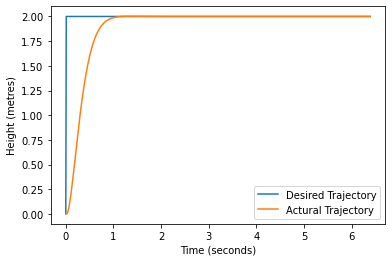

In [3]:
# simulation: rise to a given height and hover
def const_height_traj(t):
    return [2, 0, 0]

# define PD control parameters
Kp = 30
Kv = 10
t = np.arange(0.0, n_iter*t_step, t_step)

# setting up the arrays to store desired trajectory and actual trajectory
z, z_dot, z_dotdot = [0] * n_iter, [0] * n_iter, [0] * n_iter
z_des, z_dot_des, z_dotdot_des = [0] * n_iter, [0] * n_iter, [0] * n_iter

# setting up the initial values for actual trajectory
z[0], z_dot[0], z_dotdot[0] = z0, z_dot0, z_dotdot0

# error = desired trajectory - actual trajectory
# the goal is to let the error decrease to zero quickly
# this allows us to determine the acceleration at any time instant
for i in range(1, n_iter):
    z_des[i], z_dot_des[i], z_dotdot_des[i] = const_height_traj(i*t_step)
    z[i] = z[i-1] + z_dot[i-1] * t_step
    z_dot[i] = z_dot[i-1] + z_dotdot[i-1] * t_step
    z_dotdot[i] = z_dotdot_des[i] + Kv * (z_dot_des[i] - z_dot[i]) + Kp * (z_des[i] - z[i])

fig, ax = plt.subplots()

line1 = ax.plot(t, z_des, label='Desired Trajectory')
line2 = ax.plot(t, z, label='Actural Trajectory')

ax.legend()
plt.ylabel('Height (metres)')
plt.xlabel('Time (seconds)')
plt.show()

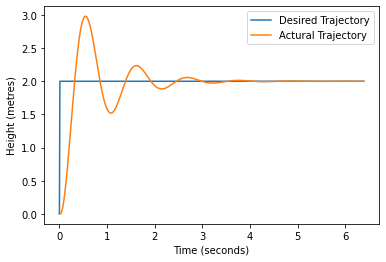

In [9]:
# define PD control parameters
# large Kp / low Kv case
# quadrotor can rise to desired height very quickly, but it would overshoot
# quadrotor would oscillate about the desired height before settling down
Kp = 36
Kv = 3

t = np.arange(0.0, n_iter*t_step, t_step)

z, z_dot, z_dotdot = [0] * n_iter, [0] * n_iter, [0] * n_iter
z_des, z_dot_des, z_dotdot_des = [0] * n_iter, [0] * n_iter, [0] * n_iter

z[0], z_dot[0], z_dotdot[0] = z0, z_dot0, z_dotdot0

for i in range(1, n_iter):
    z_des[i], z_dot_des[i], z_dotdot_des[i] = const_height_traj(i*t_step)
    z[i] = z[i-1] + z_dot[i-1] * t_step
    z_dot[i] = z_dot[i-1] + z_dotdot[i-1] * t_step
    z_dotdot[i] = z_dotdot_des[i] + Kv * (z_dot_des[i] - z_dot[i]) + Kp * (z_des[i] - z[i])

fig, ax = plt.subplots()

line1 = ax.plot(t, z_des, label='Desired Trajectory')
line2 = ax.plot(t, z, label='Actural Trajectory')

ax.legend()
plt.ylabel('Height (metres)')
plt.xlabel('Time (seconds)')
plt.show()

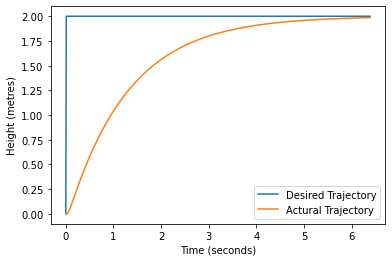

In [5]:
# define PD control parameters
# low Kp / high Kv case
# quadrotor would not overshoot, but it takes long time to reach desired position
Kp = 15
Kv = 20

t = np.arange(0.0, n_iter*t_step, t_step)

z, z_dot, z_dotdot = [0] * n_iter, [0] * n_iter, [0] * n_iter
z_des, z_dot_des, z_dotdot_des = [0] * n_iter, [0] * n_iter, [0] * n_iter

z[0], z_dot[0], z_dotdot[0] = z0, z_dot0, z_dotdot0

for i in range(1, n_iter):
    z_des[i], z_dot_des[i], z_dotdot_des[i] = const_height_traj(i*t_step)
    z[i] = z[i-1] + z_dot[i-1] * t_step
    z_dot[i] = z_dot[i-1] + z_dotdot[i-1] * t_step
    z_dotdot[i] = z_dotdot_des[i] + Kv * (z_dot_des[i] - z_dot[i]) + Kp * (z_des[i] - z[i])

fig, ax = plt.subplots()

line1 = ax.plot(t, z_des, label='Desired Trajectory')
line2 = ax.plot(t, z, label='Actural Trajectory')

ax.legend()
plt.ylabel('Height (metres)')
plt.xlabel('Time (seconds)')
plt.show()

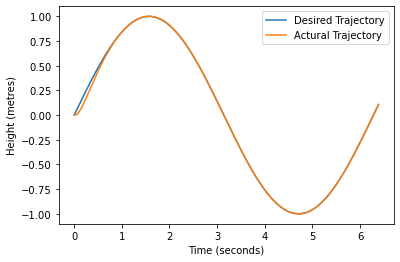

In [6]:
# simulation: motion along a sine curve
def sine_traj(t):
    z_des = np.sin(t)
    z_dot_des = np.cos(t)
    z_dotdot_des = -np.sin(t)
    return [z_des, z_dot_des, z_dotdot_des]

# define PD control parameters
Kp = 30
Kv = 10
t = np.arange(0.0, n_iter*t_step, t_step)

z, z_dot, z_dotdot = [0] * n_iter, [0] * n_iter, [0] * n_iter
z_des, z_dot_des, z_dotdot_des = [0] * n_iter, [0] * n_iter, [0] * n_iter

z[0], z_dot[0], z_dotdot[0] = z0, z_dot0, z_dotdot0

for i in range(1, n_iter):
    z_des[i], z_dot_des[i], z_dotdot_des[i] = sine_traj(i*t_step)
    z[i] = z[i-1] + z_dot[i-1] * t_step
    z_dot[i] = z_dot[i-1] + z_dotdot[i-1] * t_step
    z_dotdot[i] = z_dotdot_des[i] + Kv * (z_dot_des[i] - z_dot[i]) + Kp * (z_des[i] - z[i])

fig, ax = plt.subplots()

line1 = ax.plot(t, z_des, label='Desired Trajectory')
line2 = ax.plot(t, z, label='Actural Trajectory')

ax.legend()
plt.ylabel('Height (metres)')
plt.xlabel('Time (seconds)')
plt.show()

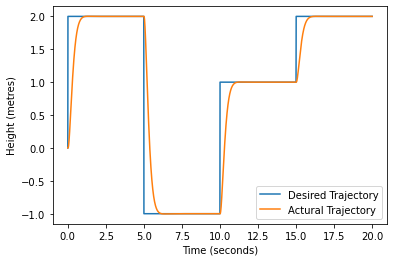

In [7]:
# simulation: jumping and hovering at a series of heights
def step_jump_traj(t):
    if t < total_time * 0.25:
        return [2, 0, 0]
    elif t < total_time * 0.5:
        return [-1, 0, 0]
    elif t < total_time * 0.75:
        return [1, 0, 0]
    else:
        return [2, 0, 0]

# define PD control parameters
Kp = 30
Kv = 10
n_iter = 2000
total_time = t_step * n_iter
t = np.arange(0.0, n_iter*t_step, t_step)

z, z_dot, z_dotdot = [0] * n_iter, [0] * n_iter, [0] * n_iter
z_des, z_dot_des, z_dotdot_des = [0] * n_iter, [0] * n_iter, [0] * n_iter

z[0], z_dot[0], z_dotdot[0] = z0, z_dot0, z_dotdot0

for i in range(1, n_iter):
    z_des[i], z_dot_des[i], z_dotdot_des[i] = step_jump_traj(i*t_step)
    z[i] = z[i-1] + z_dot[i-1] * t_step
    z_dot[i] = z_dot[i-1] + z_dotdot[i-1] * t_step
    z_dotdot[i] = z_dotdot_des[i] + Kv * (z_dot_des[i] - z_dot[i]) + Kp * (z_des[i] - z[i])

fig, ax = plt.subplots()

line1 = ax.plot(t, z_des, label='Desired Trajectory')
line2 = ax.plot(t, z, label='Actural Trajectory')

ax.legend()
plt.ylabel('Height (metres)')
plt.xlabel('Time (seconds)')
plt.show()

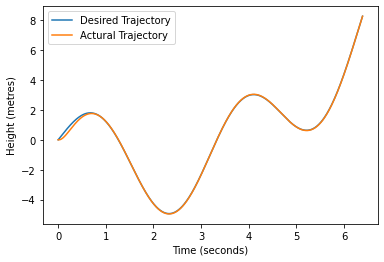

In [8]:
# simulation: motion along some awkward curve
def awkward_traj(t):
    z_des = 0.5 * t**2 - 2 * t + 3 * np.sin(2*t)
    z_dot_des = t - 2 + 6 * np.cos(2*t)
    z_dotdot_des = 1 - 12 * np.sin(2*t)
    return [z_des, z_dot_des, z_dotdot_des]

# define PD control parameters
Kp = 30
Kv = 10
n_iter = 640
t = np.arange(0.0, n_iter*t_step, t_step)

z, z_dot, z_dotdot = [0] * n_iter, [0] * n_iter, [0] * n_iter
z_des, z_dot_des, z_dotdot_des = [0] * n_iter, [0] * n_iter, [0] * n_iter

z[0], z_dot[0], z_dotdot[0] = z0, z_dot0, z_dotdot0

for i in range(1, n_iter):
    z_des[i], z_dot_des[i], z_dotdot_des[i] = awkward_traj(i*t_step)
    z[i] = z[i-1] + z_dot[i-1] * t_step
    z_dot[i] = z_dot[i-1] + z_dotdot[i-1] * t_step
    z_dotdot[i] = z_dotdot_des[i] + Kv * (z_dot_des[i] - z_dot[i]) + Kp * (z_des[i] - z[i])

fig, ax = plt.subplots()

line1 = ax.plot(t, z_des, label='Desired Trajectory')
line2 = ax.plot(t, z, label='Actural Trajectory')

ax.legend()
plt.ylabel('Height (metres)')
plt.xlabel('Time (seconds)')
plt.show()